In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import seaborn as sns

# Demographic perspective

In [65]:
df_demo_hierarchical=pd.read_csv('df_demo_hierarchical.csv',delimiter=',')
df_demo_k=pd.read_csv('df_demo_k.csv',delimiter=',')
df_demo_mixed=pd.read_csv('df_demo_mixed.csv',delimiter=',')
df=pd.read_csv('df_clean.csv',delimiter=',')

In [66]:
df_demo_hierarchical.set_index('customer_id',inplace=True)
df_demo_k.set_index('customer_id',inplace=True)
df_demo_mixed.set_index('customer_id',inplace=True)
df.set_index('customer_id',inplace=True)

In [67]:
df_hierarchical=pd.concat([df_demo_hierarchical['cluster'],df],join='inner',axis=1)
df_hierarchical=df_hierarchical[['cluster','customer_age']]

In [68]:
df_k=pd.concat([df_demo_k['cluster'],df],join='inner',axis=1)
df_k=df_k[['cluster','customer_age']]

In [69]:
df_mixed=pd.concat([df_demo_mixed['cluster'],df],join='inner',axis=1)
df_mixed=df_mixed[['cluster','customer_age']]

In [70]:
cluster_means = df_hierarchical.groupby('cluster').mean()['customer_age'].T
cluster_means
# cluster_means.style.format(precision=2).background_gradient(axis=1)

cluster
0    23.520958
1    38.855293
2    31.098061
3    53.203675
Name: customer_age, dtype: float64

In [71]:
cluster_means = df_k.groupby('cluster').mean()['customer_age'].T
cluster_means

cluster
0    21.568153
1    40.544349
2    26.733175
3    32.421422
4    54.032986
Name: customer_age, dtype: float64

In [72]:
cluster_means = df_mixed.groupby('cluster').mean()['customer_age'].T
cluster_means

cluster
0    24.515178
1    68.283784
2    36.419741
3    51.276339
Name: customer_age, dtype: float64

# Psycographic perspective

In [73]:
df_psy_hierarchical=pd.read_csv('df_psy_hierarchical.csv',delimiter=',')
df_psy_k=pd.read_csv('df_psy_k.csv',delimiter=',')
df_psy_mixed=pd.read_csv('df_psy_mixed.csv',delimiter=',')

In [48]:
df_psy_hierarchical.set_index('customer_id',inplace=True)
df_psy_k.set_index('customer_id',inplace=True)
df_psy_mixed.set_index('customer_id',inplace=True)

In [49]:
cuisine_columns=[col for col in df.columns if col.startswith('CUI')]
cuisine_columns=cuisine_columns+['cluster']

In [50]:
df_hierarchical=pd.concat([df_psy_hierarchical['cluster'],df],join='inner',axis=1)
df_hierarchical=df_hierarchical[cuisine_columns]

In [51]:
df_k=pd.concat([df_psy_k['cluster'],df],join='inner',axis=1)
df_k=df_k[cuisine_columns]

In [52]:
df_mixed=pd.concat([df_psy_mixed['cluster'],df],join='inner',axis=1)
df_mixed=df_mixed[cuisine_columns]

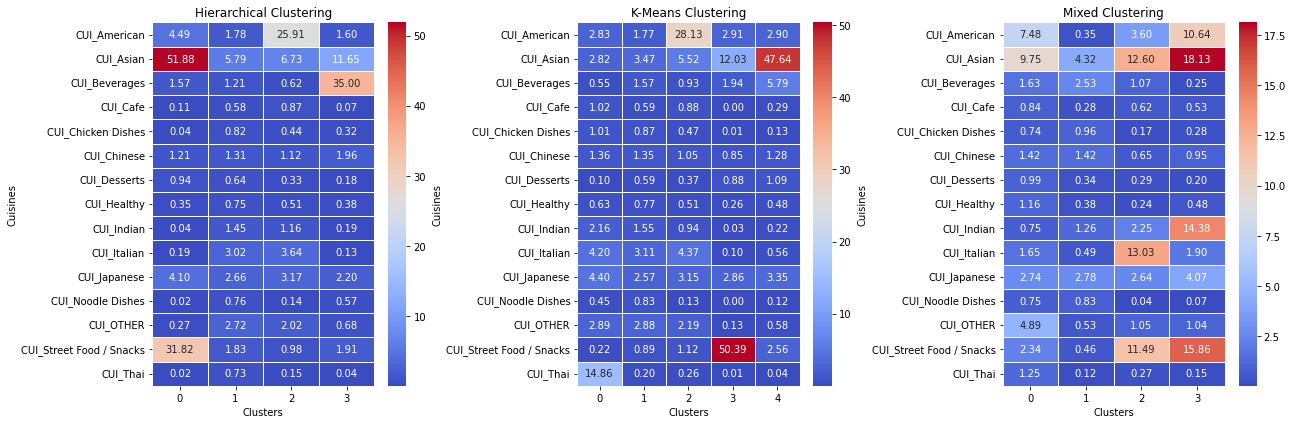

In [57]:
cluster_means_hierarchical = df_hierarchical.groupby('cluster').mean()[cuisine_columns].T
cluster_means_k = df_k.groupby('cluster').mean()[cuisine_columns].T
cluster_means_mixed = df_mixed.groupby('cluster').mean()[cuisine_columns].T

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust layout: 1 row, 3 columns

# Heatmap for df_hierarchical
sns.heatmap(cluster_means_hierarchical, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0])
axes[0].set_title('Hierarchical Clustering')

# Heatmap for df_k
sns.heatmap(cluster_means_k, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1])
axes[1].set_title('K-Means Clustering')

# Heatmap for df_mixed
sns.heatmap(cluster_means_mixed, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[2])
axes[2].set_title('Mixed Clustering')

# Set common labels
for ax in axes:
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Cuisines')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()